In [1]:
import os
from tqdm import tqdm
import cv2
import numpy as np
from glob import glob
import matplotlib.pyplot as plt
from natsort import natsorted
from scipy.signal import find_peaks
import NDT

In [2]:
pipe_path = "/home/dais01/Preprocess/data/Data/Raw_Data_png/202212/ALL/9.53/22G017-09-002"
image_list = glob(os.path.join(pipe_path, "*.png"))
image_list = natsorted(image_list)
merge_image = []
left_endtab_x, left_endtab_index, right_endtab_x, right_endtab_index, check_IQI_list = NDT.cut_endtab(pipe_path)

image_shape = cv2.imread(image_list[0], cv2.IMREAD_GRAYSCALE).shape

for i in tqdm(range(len(image_list))):
    image = cv2.imread(image_list[i], cv2.IMREAD_GRAYSCALE)
    #image = cv2.normalize(image, None, 0, 255, cv2.NORM_MINMAX)
    merge_image.append(image)
    
merge_image = np.concatenate(merge_image, axis=1)
merge_image_shape = merge_image.shape
center_x = merge_image_shape[1] // 2


left_endtab_x: 367 right_endtab_x: -1880


100%|██████████| 107/107 [00:00<00:00, 141.85it/s]


In [3]:
cut_endtab_merged_image_mean = np.mean(merge_image[:,left_endtab_x:right_endtab_x])
cut_endtab_merged_image_mean = np.tile(cut_endtab_merged_image_mean, (1256))
cut_endtab_merged_image_mean.shape

(1256,)

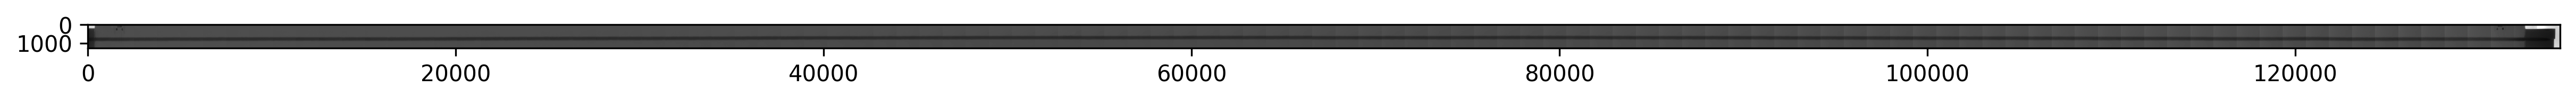

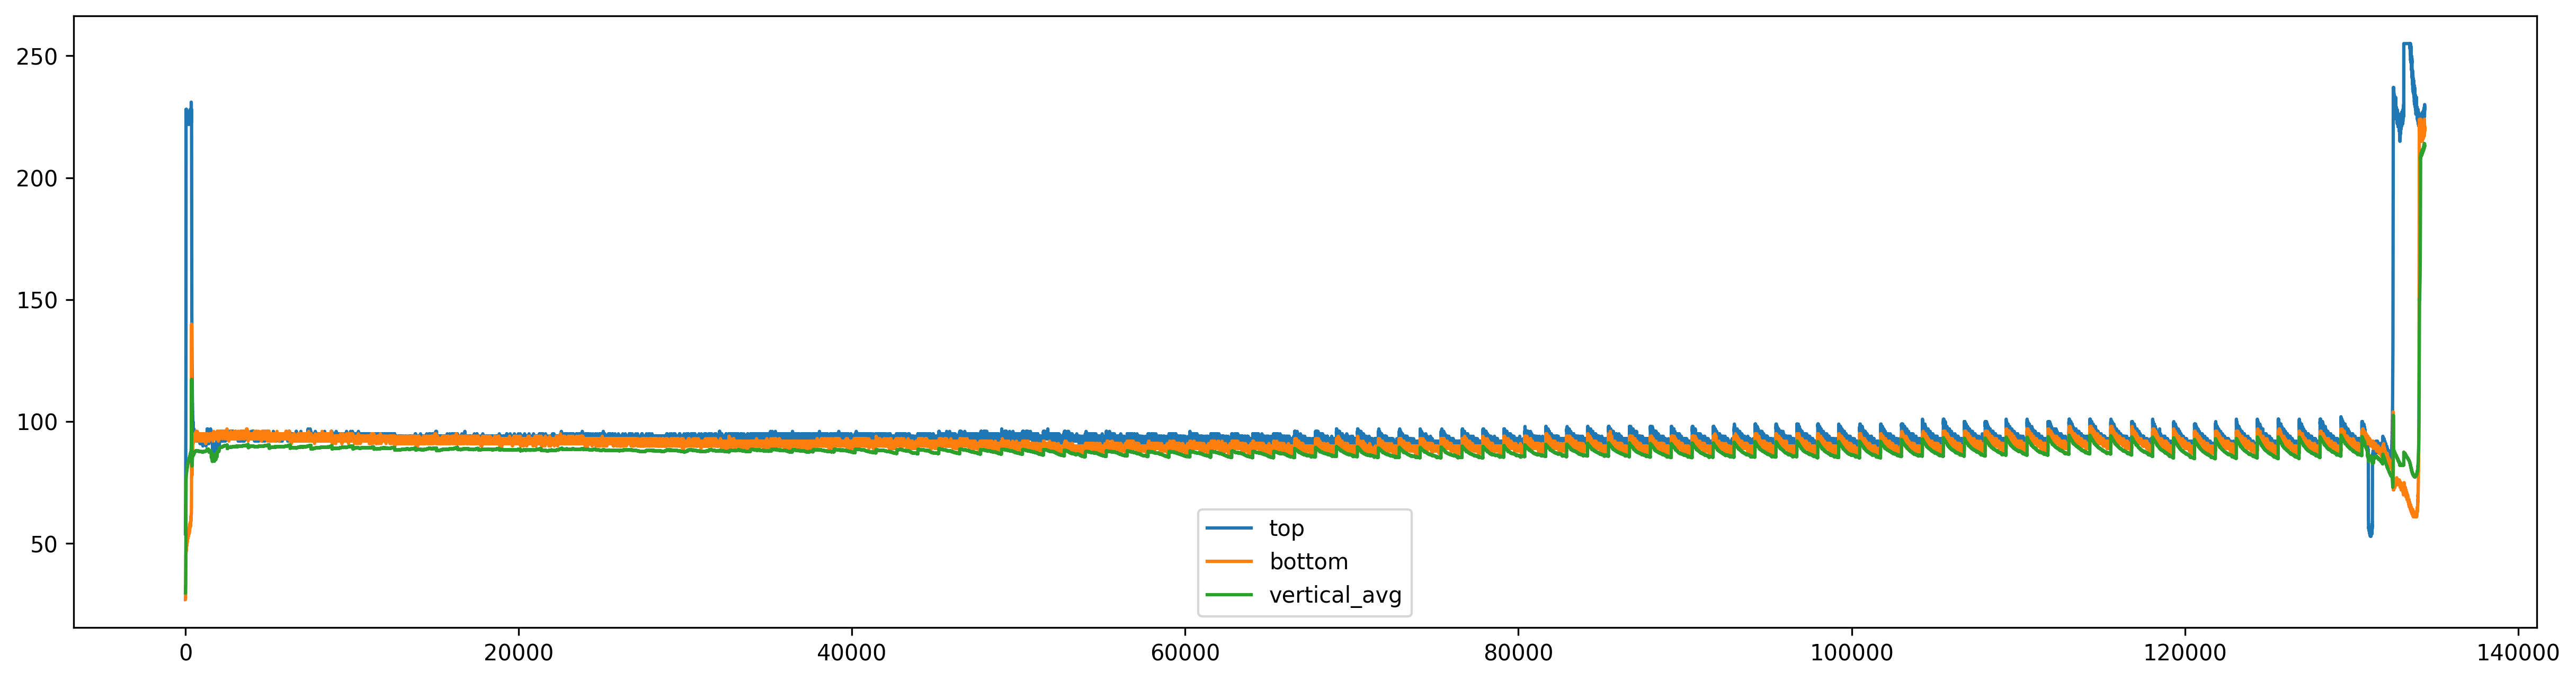

In [4]:
plt.figure(figsize=(20, 5), dpi=300)
plt.imshow(merge_image, cmap='gray')

top_merge_image = merge_image[0, :]
bottom_merge_image = merge_image[-1, :]
vertical_avg = np.mean(merge_image, axis=0)

argmax_top_1 = np.argmax(top_merge_image[center_x:])
argmax_bottom_1 = np.argmax(bottom_merge_image[center_x:])
argmax_vertical_1 = np.argmax(vertical_avg[center_x:])
argmax_top_2 = np.argmax(top_merge_image[:center_x])
argmax_bottom_2 = np.argmax(bottom_merge_image[:center_x])
argmax_vertical_2 = np.argmax(vertical_avg[:center_x])

#1차 검출
min_edge = np.max([argmax_top_2, argmax_bottom_2, argmax_vertical_2]) 
max_edge = merge_image_shape[1] - (np.min([argmax_top_1, argmax_bottom_1, argmax_vertical_1]) + center_x) 

min_index = min_edge // 1256
max_index = max_edge // 1256

plt.figure(figsize=(20, 5), dpi=300)
plt.plot(top_merge_image)
plt.plot(bottom_merge_image)
plt.plot(vertical_avg)
plt.legend(['top', 'bottom', 'vertical_avg'])

In [17]:
merge_image = []
for i in tqdm(range(len(image_list))):
    if i == check_IQI_list[0]:
        image = cv2.imread(image_list[i], cv2.IMREAD_GRAYSCALE)
        image_ = cv2.imread(image_list[i+2], cv2.IMREAD_GRAYSCALE)
        #float32로 변환해줘야함
        image = image.astype(np.float32)
        image_ = image_.astype(np.float32)
        image_mean = np.mean(image_, axis=0)
    elif i == check_IQI_list[1]:
        image = cv2.imread(image_list[i], cv2.IMREAD_GRAYSCALE)
        image_ = cv2.imread(image_list[i-2], cv2.IMREAD_GRAYSCALE)
        image = image.astype(np.float32)
        image_ = image_.astype(np.float32)
        image_mean = np.mean(image_, axis=0)
    else:
        image = cv2.imread(image_list[i], cv2.IMREAD_GRAYSCALE)
        image = image.astype(np.float32)
        #이미지에 좌우 밝기 불균형이 있어서 mean_image에 맞게 세로축에 대해 밝기를 조절해줌
        image_mean = np.mean(image, axis=0)
    
    diff = cut_endtab_merged_image_mean - image_mean
    diff = np.tile(diff, (image.shape[0], 1))
    image = image + diff
    merge_image.append(image)

merge_image = np.concatenate(merge_image, axis=1)
merge_image = merge_image[:, left_endtab_x+50:right_endtab_x-50]
merge_image = cv2.normalize(merge_image, None, 0, 255, cv2.NORM_MINMAX)
cv2.imwrite("/home/dais01/Preprocess/temp/merge_image_normalized.png", merge_image)

        
        
        
        
    
    
    

100%|██████████| 107/107 [00:01<00:00, 70.93it/s]


True

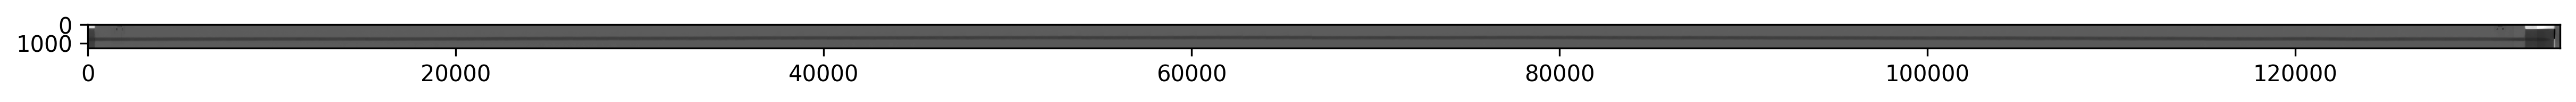

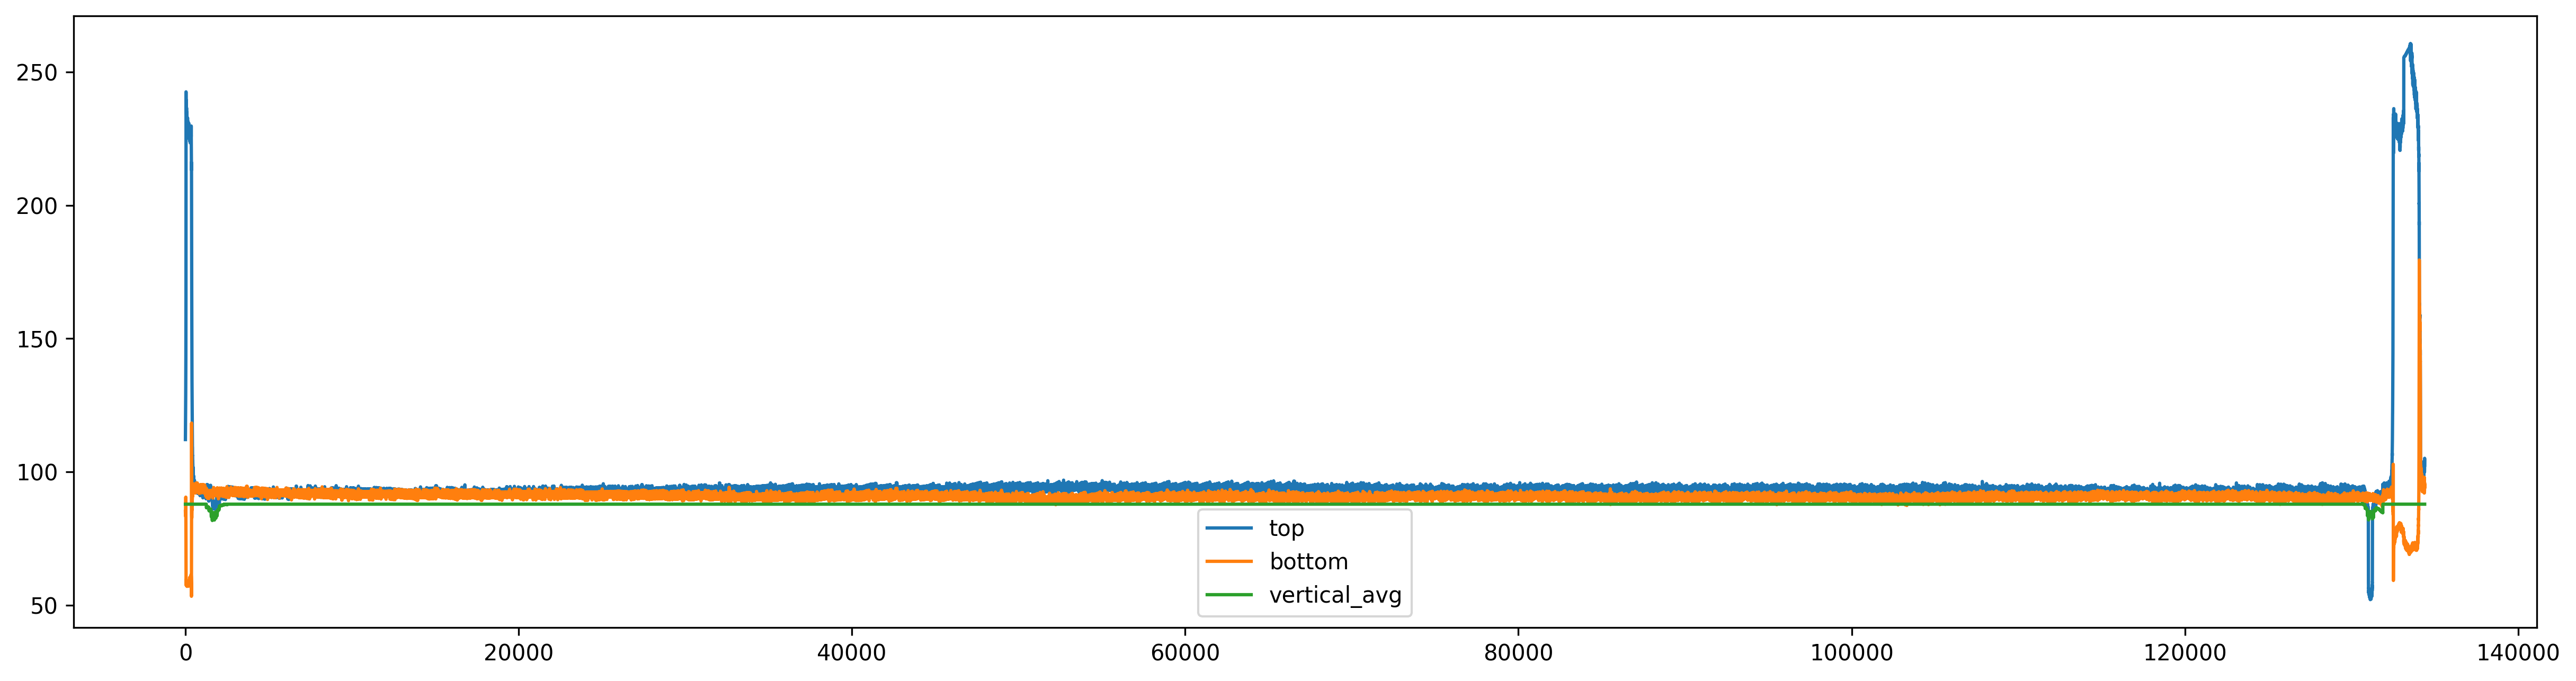

In [6]:
plt.figure(figsize=(20, 5), dpi=300)
plt.imshow(merge_image, cmap='gray')

top_merge_image = merge_image[0, :]
bottom_merge_image = merge_image[-1, :]
vertical_avg = np.mean(merge_image, axis=0)

argmax_top_1 = np.argmax(top_merge_image[center_x:])
argmax_bottom_1 = np.argmax(bottom_merge_image[center_x:])
argmax_vertical_1 = np.argmax(vertical_avg[center_x:])
argmax_top_2 = np.argmax(top_merge_image[:center_x])
argmax_bottom_2 = np.argmax(bottom_merge_image[:center_x])
argmax_vertical_2 = np.argmax(vertical_avg[:center_x])

#1차 검출
min_edge = np.max([argmax_top_2, argmax_bottom_2, argmax_vertical_2]) 
max_edge = merge_image_shape[1] - (np.min([argmax_top_1, argmax_bottom_1, argmax_vertical_1]) + center_x) 

min_index = min_edge // 1256
max_index = max_edge // 1256

plt.figure(figsize=(20, 5), dpi=300)
plt.plot(top_merge_image)
plt.plot(bottom_merge_image)
plt.plot(vertical_avg)
plt.legend(['top', 'bottom', 'vertical_avg'])